# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 10 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Evaluation model trained on ICAO-208',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '10 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': False,
        'save_trained_model': False,
        'orig_model_experiment_id': 'ICAO-208',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 5660
Process ID: 15678
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 10 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Evaluation model trained on ICAO-208',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '10 epochs',
                         'handcrafted_2']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size'

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


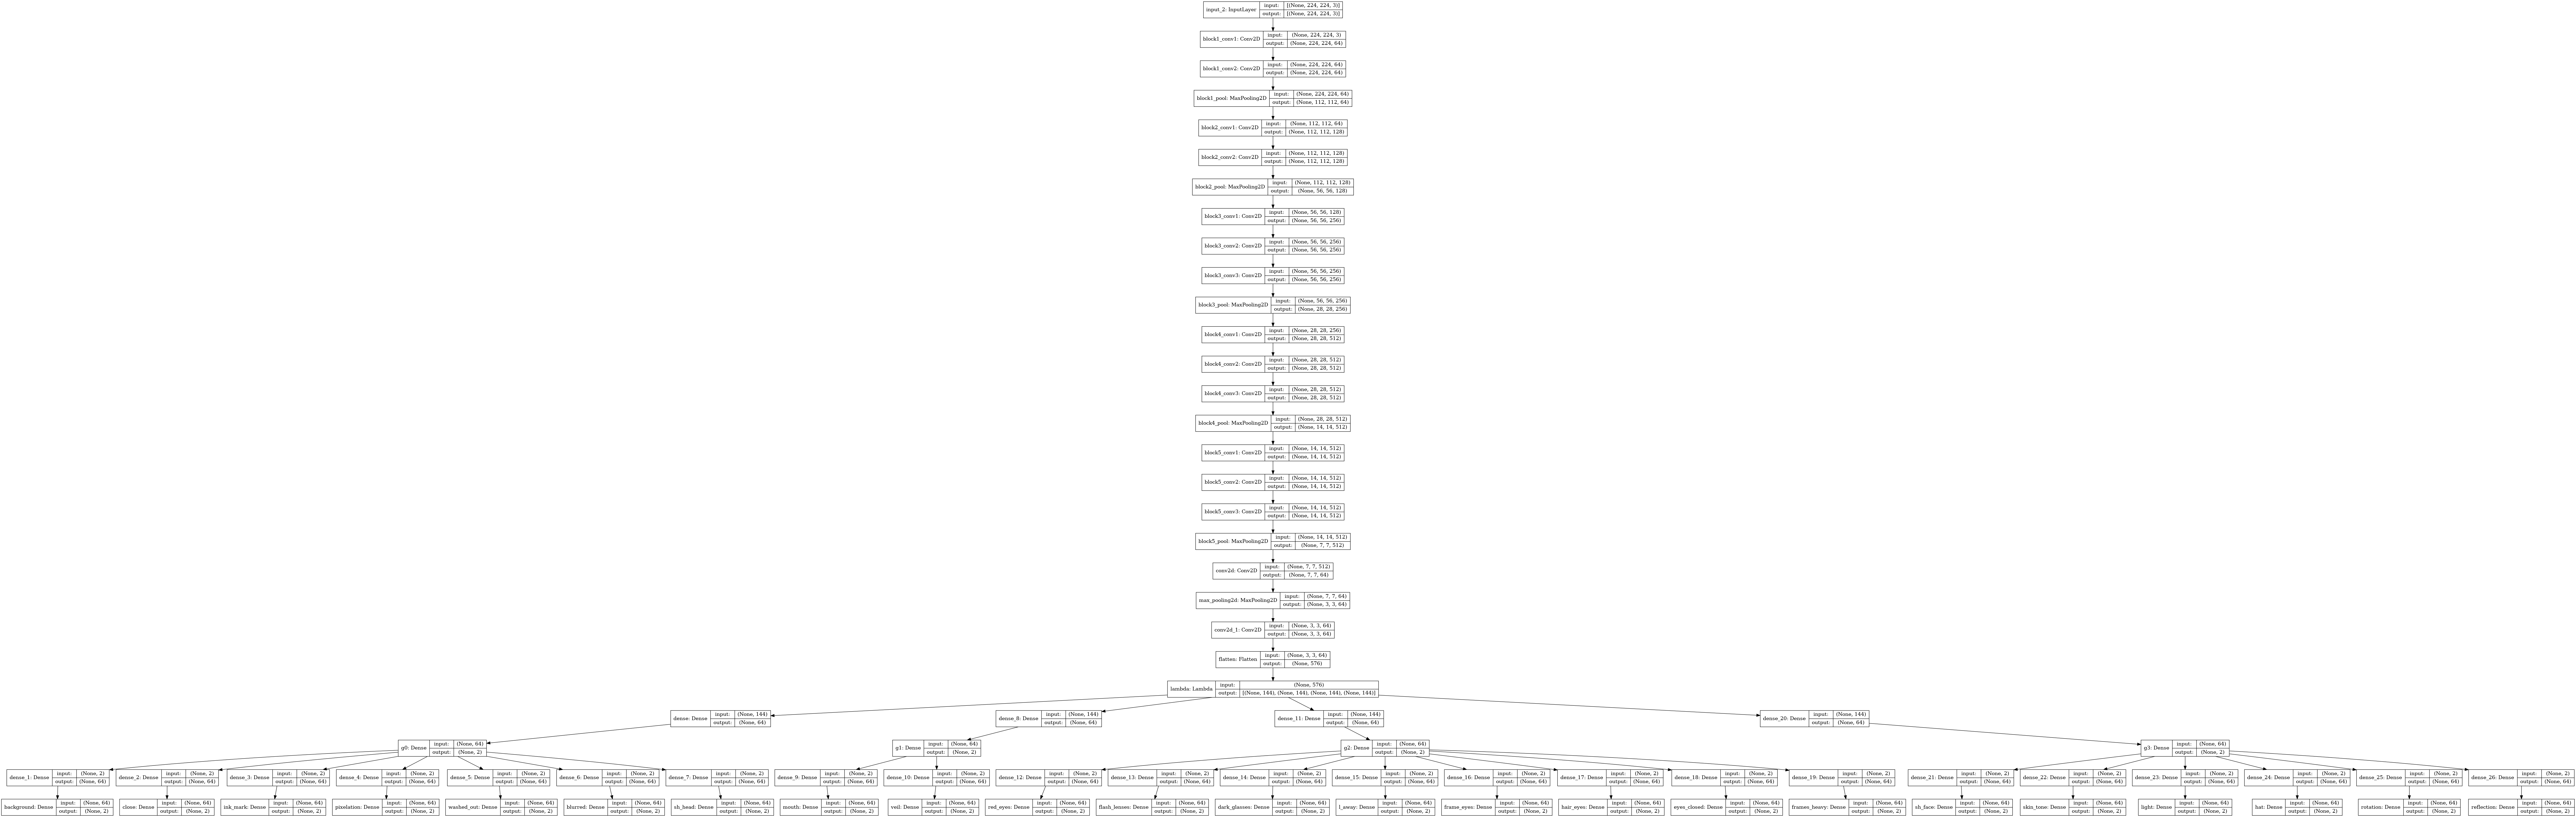

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

# Training Model

In [11]:
runner.train_model()

-------------------- train model -------------------
Not training a model. Downloading data from Neptune
 ..Experiment ID: ICAO-208
 ..Downloading data from previous experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-208
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..

# Plots

In [12]:
runner.draw_training_history()

-------------------- draw training history -------------------
Not training a model. Downloading plot from Neptune
 ..Experiment ID: ICAO-208
 ..Downloading plot from previous experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-208
 ..Download finished
 ..Uploading plot
 ..Upload finished


# Load Best Model

In [13]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Model loaded
...Model path: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-208


# Saving Trained Model

In [14]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 39s 3s/step
Prediction finished!
Requisite: MOUTH


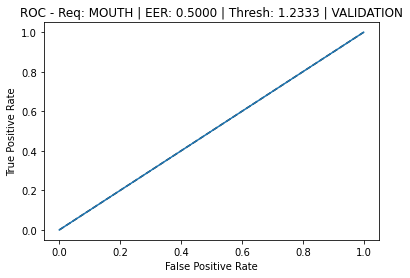

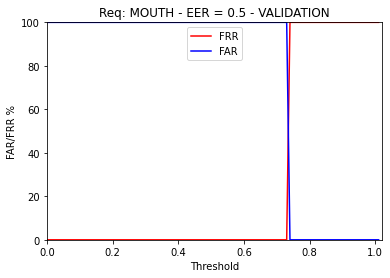

Requisite: MOUTH - EER_interp: 50.0% - Best Threshold: 1.2333283424377441
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.23      1.00      0.38       127
    COMPLIANT       0.00      0.00      0.00       420

     accuracy                           0.23       547
    macro avg       0.12      0.50      0.19       547
 weighted avg       0.05      0.23      0.09       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 127 | FP: 0 | FN: 420
Accuracy ------------------------------------------------
Model Accuracy: 23.22%
---------------------------------------------------------
Requisite: ROTATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


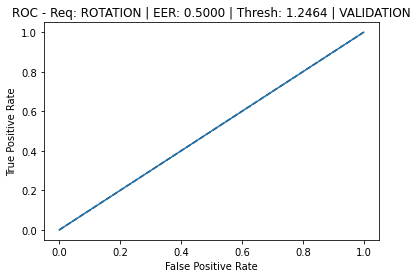

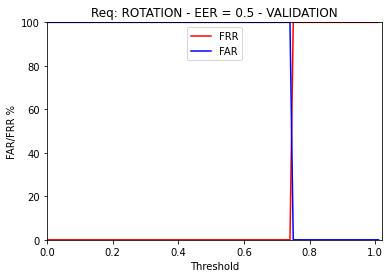

Requisite: ROTATION - EER_interp: 50.0% - Best Threshold: 1.2463691234588623
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      1.00      0.40       137
    COMPLIANT       0.00      0.00      0.00       410

     accuracy                           0.25       547
    macro avg       0.13      0.50      0.20       547
 weighted avg       0.06      0.25      0.10       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 137 | FP: 0 | FN: 410
Accuracy ------------------------------------------------
Model Accuracy: 25.05%
---------------------------------------------------------
Requisite: L_AWAY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


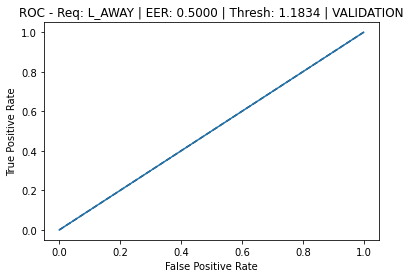

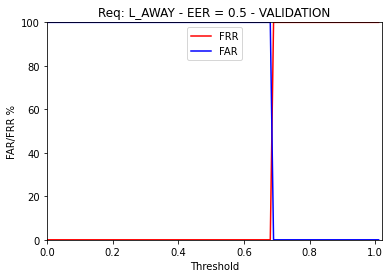

Requisite: L_AWAY - EER_interp: 50.0% - Best Threshold: 1.1833722591400146
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      1.00      0.46       165
    COMPLIANT       0.00      0.00      0.00       382

     accuracy                           0.30       547
    macro avg       0.15      0.50      0.23       547
 weighted avg       0.09      0.30      0.14       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 165 | FP: 0 | FN: 382
Accuracy ------------------------------------------------
Model Accuracy: 30.159999999999997%
---------------------------------------------------------
Requisite: EYES_CLOSED


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


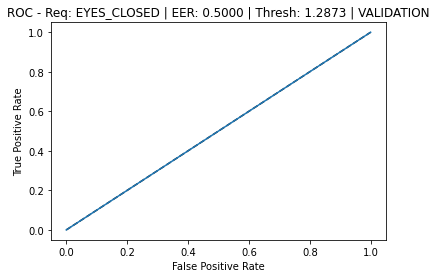

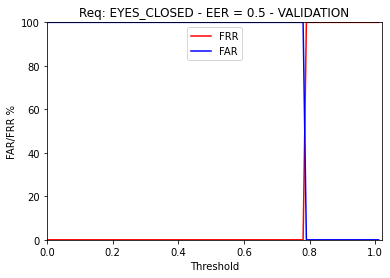

Requisite: EYES_CLOSED - EER_interp: 50.0% - Best Threshold: 1.2873241901397705
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      1.00      0.32       106
    COMPLIANT       0.00      0.00      0.00       441

     accuracy                           0.19       547
    macro avg       0.10      0.50      0.16       547
 weighted avg       0.04      0.19      0.06       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 106 | FP: 0 | FN: 441
Accuracy ------------------------------------------------
Model Accuracy: 19.38%
---------------------------------------------------------
Requisite: CLOSE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


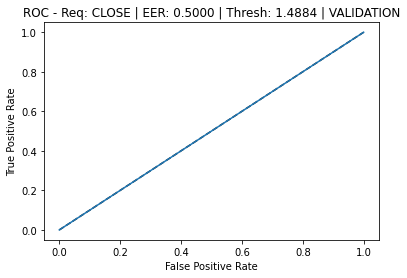

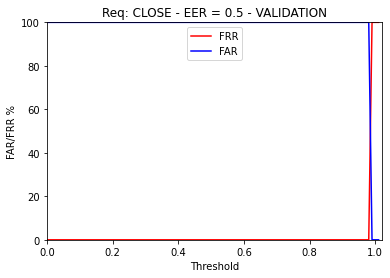

Requisite: CLOSE - EER_interp: 50.0% - Best Threshold: 1.4884271621704102
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.02         6
    COMPLIANT       0.00      0.00      0.00       541

     accuracy                           0.01       547
    macro avg       0.01      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 6 | FP: 0 | FN: 541
Accuracy ------------------------------------------------
Model Accuracy: 1.0999999999999999%
---------------------------------------------------------
Requisite: HAT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


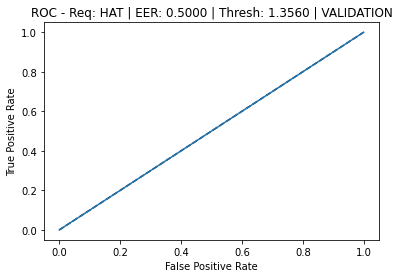

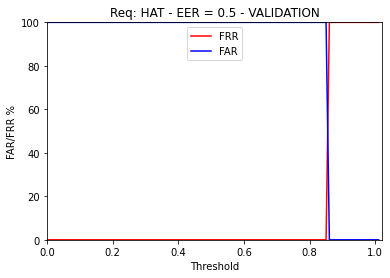

Requisite: HAT - EER_interp: 50.0% - Best Threshold: 1.356014996767044
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      1.00      0.29        93
    COMPLIANT       0.00      0.00      0.00       454

     accuracy                           0.17       547
    macro avg       0.09      0.50      0.15       547
 weighted avg       0.03      0.17      0.05       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 93 | FP: 0 | FN: 454
Accuracy ------------------------------------------------
Model Accuracy: 17.0%
---------------------------------------------------------
Requisite: DARK_GLASSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


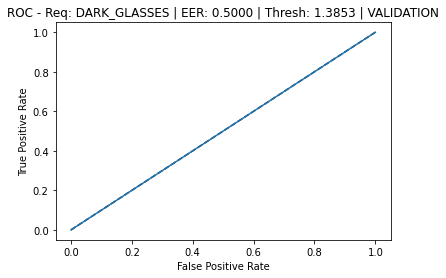

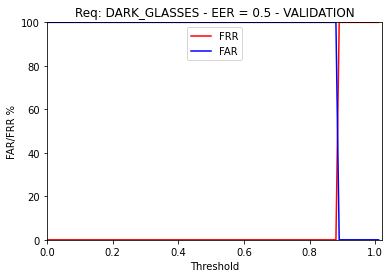

Requisite: DARK_GLASSES - EER_interp: 50.0% - Best Threshold: 1.3852572739124298
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      1.00      0.17        52
    COMPLIANT       0.00      0.00      0.00       495

     accuracy                           0.10       547
    macro avg       0.05      0.50      0.09       547
 weighted avg       0.01      0.10      0.02       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 52 | FP: 0 | FN: 495
Accuracy ------------------------------------------------
Model Accuracy: 9.51%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


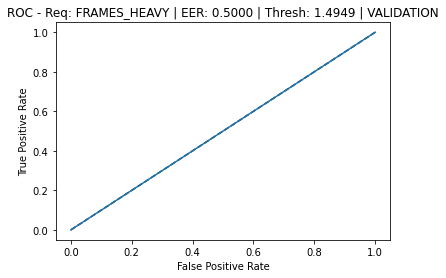

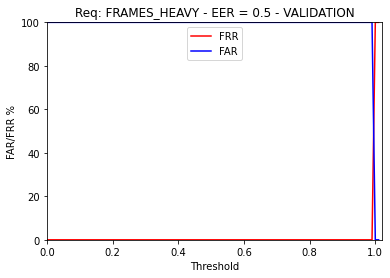

Requisite: FRAMES_HEAVY - EER_interp: 50.0% - Best Threshold: 1.4948934316635132
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         3
    COMPLIANT       0.00      0.00      0.00       544

     accuracy                           0.01       547
    macro avg       0.00      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 3 | FP: 0 | FN: 544
Accuracy ------------------------------------------------
Model Accuracy: 0.5499999999999999%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


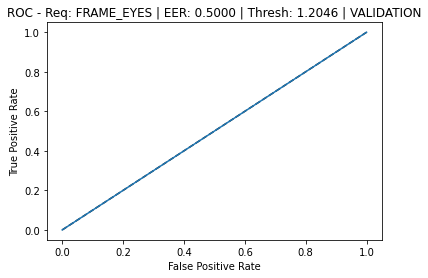

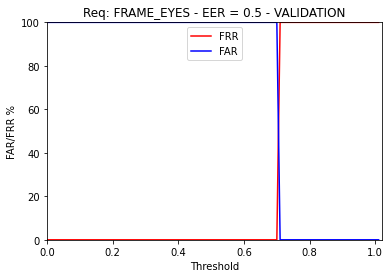

Requisite: FRAME_EYES - EER_interp: 50.0% - Best Threshold: 1.2045975029468536
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      1.00      0.43       152
    COMPLIANT       0.00      0.00      0.00       395

     accuracy                           0.28       547
    macro avg       0.14      0.50      0.22       547
 weighted avg       0.08      0.28      0.12       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 152 | FP: 0 | FN: 395
Accuracy ------------------------------------------------
Model Accuracy: 27.79%
---------------------------------------------------------
Requisite: FLASH_LENSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


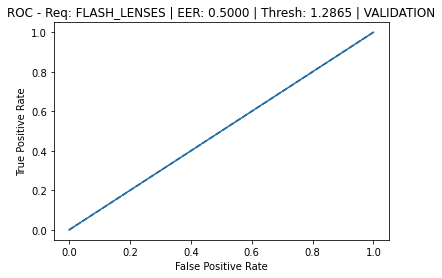

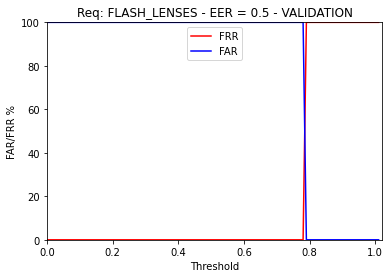

Requisite: FLASH_LENSES - EER_interp: 50.0% - Best Threshold: 1.2865169048309326
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      1.00      0.34       113
    COMPLIANT       0.00      0.00      0.00       434

     accuracy                           0.21       547
    macro avg       0.10      0.50      0.17       547
 weighted avg       0.04      0.21      0.07       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 113 | FP: 0 | FN: 434
Accuracy ------------------------------------------------
Model Accuracy: 20.66%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


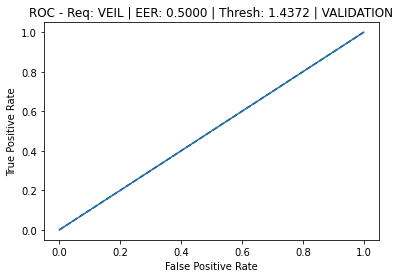

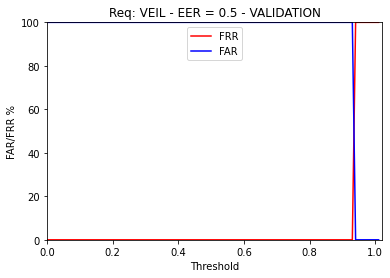

Requisite: VEIL - EER_interp: 50.0% - Best Threshold: 1.4372345209121704
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      1.00      0.11        33
    COMPLIANT       0.00      0.00      0.00       514

     accuracy                           0.06       547
    macro avg       0.03      0.50      0.06       547
 weighted avg       0.00      0.06      0.01       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 33 | FP: 0 | FN: 514
Accuracy ------------------------------------------------
Model Accuracy: 6.03%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


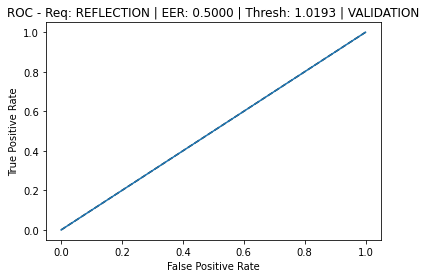

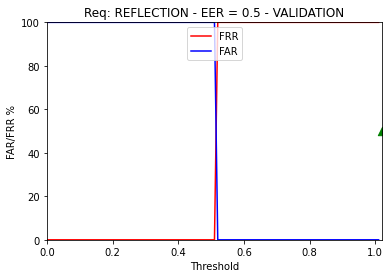

Requisite: REFLECTION - EER_interp: 50.0% - Best Threshold: 1.0192770957946777
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      1.00      0.65       265
    COMPLIANT       0.00      0.00      0.00       282

     accuracy                           0.48       547
    macro avg       0.24      0.50      0.33       547
 weighted avg       0.23      0.48      0.32       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 265 | FP: 0 | FN: 282
Accuracy ------------------------------------------------
Model Accuracy: 48.449999999999996%
---------------------------------------------------------
Requisite: LIGHT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


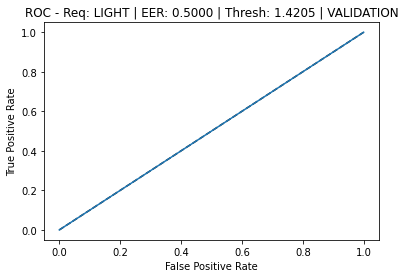

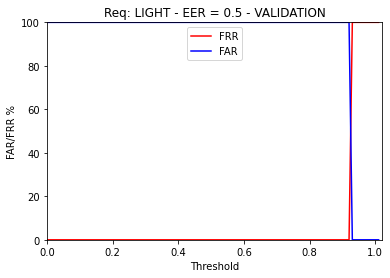

Requisite: LIGHT - EER_interp: 50.0% - Best Threshold: 1.4205305576324463
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      1.00      0.14        42
    COMPLIANT       0.00      0.00      0.00       505

     accuracy                           0.08       547
    macro avg       0.04      0.50      0.07       547
 weighted avg       0.01      0.08      0.01       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 42 | FP: 0 | FN: 505
Accuracy ------------------------------------------------
Model Accuracy: 7.68%
---------------------------------------------------------
Requisite: SH_FACE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


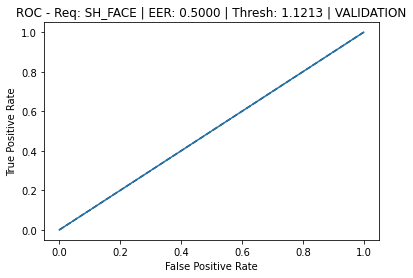

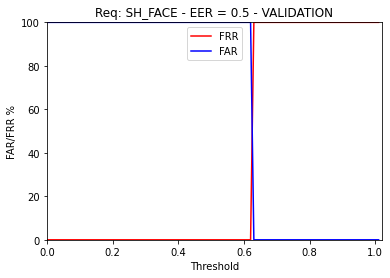

Requisite: SH_FACE - EER_interp: 50.0% - Best Threshold: 1.1212673485279083
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      1.00      0.55       205
    COMPLIANT       0.00      0.00      0.00       342

     accuracy                           0.37       547
    macro avg       0.19      0.50      0.27       547
 weighted avg       0.14      0.37      0.20       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 205 | FP: 0 | FN: 342
Accuracy ------------------------------------------------
Model Accuracy: 37.480000000000004%
---------------------------------------------------------
Requisite: SH_HEAD


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


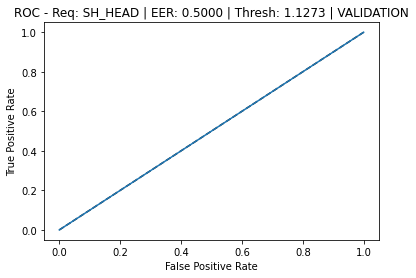

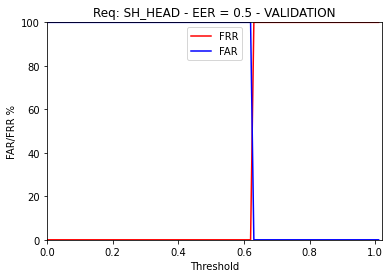

Requisite: SH_HEAD - EER_interp: 50.0% - Best Threshold: 1.1272571086883545
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      1.00      0.54       202
    COMPLIANT       0.00      0.00      0.00       345

     accuracy                           0.37       547
    macro avg       0.18      0.50      0.27       547
 weighted avg       0.14      0.37      0.20       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 202 | FP: 0 | FN: 345
Accuracy ------------------------------------------------
Model Accuracy: 36.93%
---------------------------------------------------------
Requisite: BLURRED


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


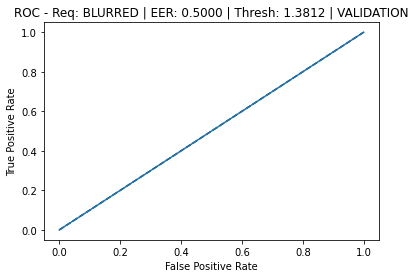

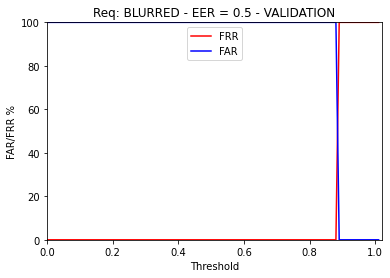

Requisite: BLURRED - EER_interp: 50.0% - Best Threshold: 1.3811997175216675
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      1.00      0.15        43
    COMPLIANT       0.00      0.00      0.00       504

     accuracy                           0.08       547
    macro avg       0.04      0.50      0.07       547
 weighted avg       0.01      0.08      0.01       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 43 | FP: 0 | FN: 504
Accuracy ------------------------------------------------
Model Accuracy: 7.86%
---------------------------------------------------------
Requisite: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


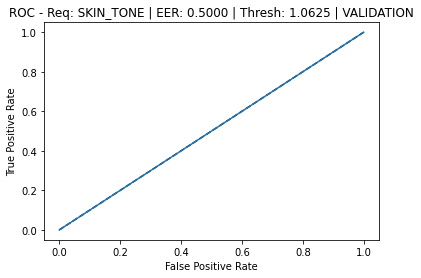

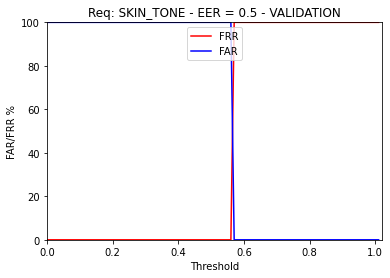

Requisite: SKIN_TONE - EER_interp: 50.0% - Best Threshold: 1.0625284910202026
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      1.00      0.60       234
    COMPLIANT       0.00      0.00      0.00       313

     accuracy                           0.43       547
    macro avg       0.21      0.50      0.30       547
 weighted avg       0.18      0.43      0.26       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 234 | FP: 0 | FN: 313
Accuracy ------------------------------------------------
Model Accuracy: 42.78%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


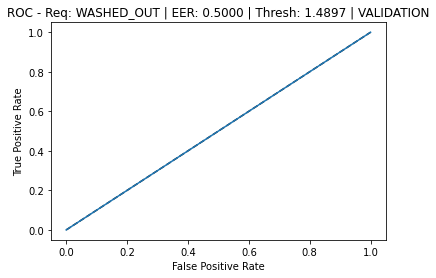

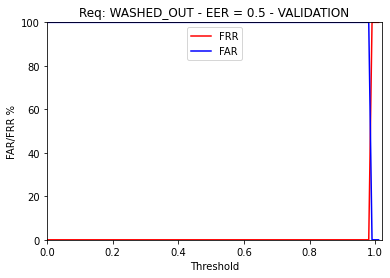

Requisite: WASHED_OUT - EER_interp: 50.0% - Best Threshold: 1.4897267818450928
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         3
    COMPLIANT       0.00      0.00      0.00       544

     accuracy                           0.01       547
    macro avg       0.00      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 3 | FP: 0 | FN: 544
Accuracy ------------------------------------------------
Model Accuracy: 0.5499999999999999%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


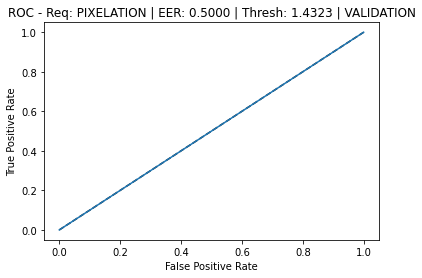

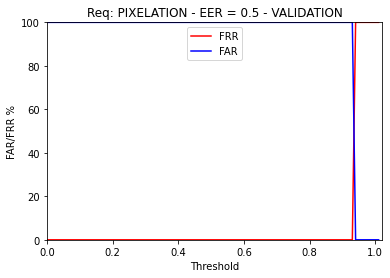

Requisite: PIXELATION - EER_interp: 50.0% - Best Threshold: 1.4323146343231201
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      1.00      0.11        31
    COMPLIANT       0.00      0.00      0.00       516

     accuracy                           0.06       547
    macro avg       0.03      0.50      0.05       547
 weighted avg       0.00      0.06      0.01       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 31 | FP: 0 | FN: 516
Accuracy ------------------------------------------------
Model Accuracy: 5.67%
---------------------------------------------------------
Requisite: HAIR_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


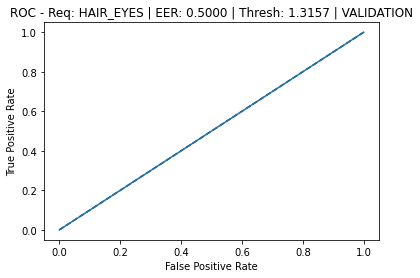

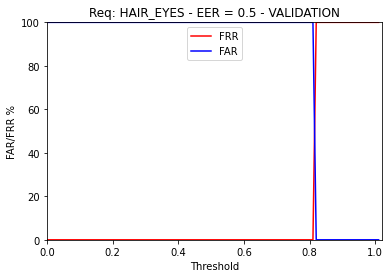

Requisite: HAIR_EYES - EER_interp: 50.0% - Best Threshold: 1.315682202577591
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      1.00      0.33       108
    COMPLIANT       0.00      0.00      0.00       439

     accuracy                           0.20       547
    macro avg       0.10      0.50      0.16       547
 weighted avg       0.04      0.20      0.07       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 108 | FP: 0 | FN: 439
Accuracy ------------------------------------------------
Model Accuracy: 19.74%
---------------------------------------------------------
Requisite: BACKGROUND


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


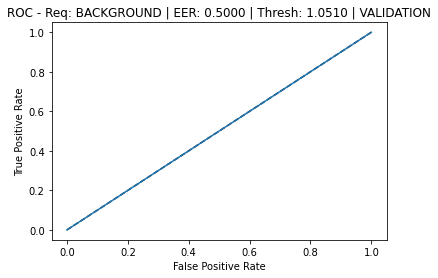

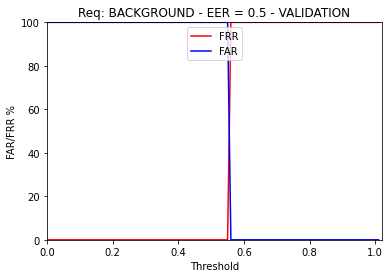

Requisite: BACKGROUND - EER_interp: 50.0% - Best Threshold: 1.0509608089923859
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.41      1.00      0.58       222
    COMPLIANT       0.00      0.00      0.00       325

     accuracy                           0.41       547
    macro avg       0.20      0.50      0.29       547
 weighted avg       0.16      0.41      0.23       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 222 | FP: 0 | FN: 325
Accuracy ------------------------------------------------
Model Accuracy: 40.589999999999996%
---------------------------------------------------------
Requisite: RED_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


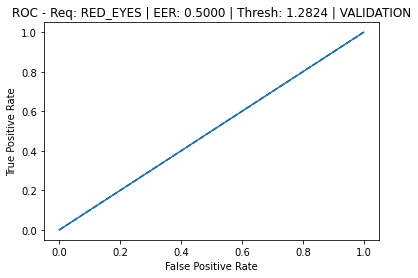

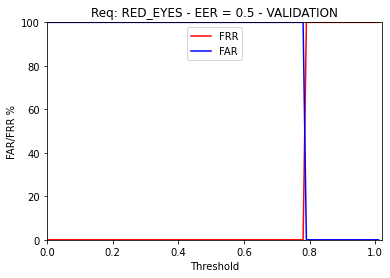

Requisite: RED_EYES - EER_interp: 50.0% - Best Threshold: 1.2824110984802246
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      1.00      0.33       110
    COMPLIANT       0.00      0.00      0.00       437

     accuracy                           0.20       547
    macro avg       0.10      0.50      0.17       547
 weighted avg       0.04      0.20      0.07       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 110 | FP: 0 | FN: 437
Accuracy ------------------------------------------------
Model Accuracy: 20.11%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
5/5 [==============================] - 21s 5s/step
Prediction finished!
Requisite: MOUTH


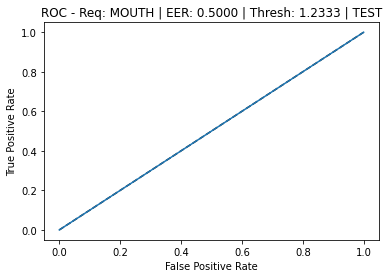

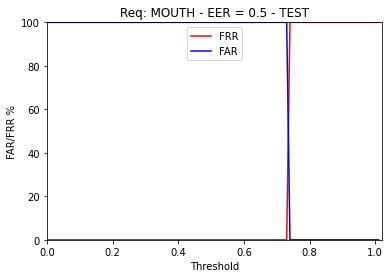

Requisite: MOUTH - EER_interp: 50.0% - Best Threshold: 1.2333283424377441
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      1.00      0.40        73
    COMPLIANT       0.00      0.00      0.00       215

     accuracy                           0.25       288
    macro avg       0.13      0.50      0.20       288
 weighted avg       0.06      0.25      0.10       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 73 | FP: 0 | FN: 215
Accuracy ------------------------------------------------
Model Accuracy: 25.35%
---------------------------------------------------------
Requisite: ROTATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


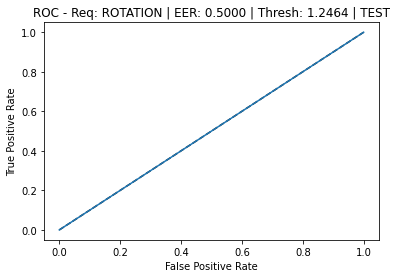

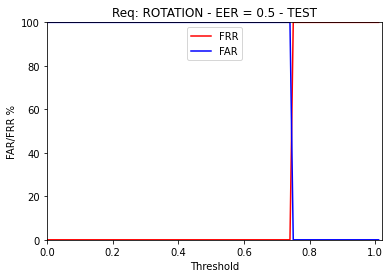

Requisite: ROTATION - EER_interp: 50.0% - Best Threshold: 1.2463691234588623
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      1.00      0.43        80
    COMPLIANT       0.00      0.00      0.00       208

     accuracy                           0.28       288
    macro avg       0.14      0.50      0.22       288
 weighted avg       0.08      0.28      0.12       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 80 | FP: 0 | FN: 208
Accuracy ------------------------------------------------
Model Accuracy: 27.779999999999998%
---------------------------------------------------------
Requisite: L_AWAY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


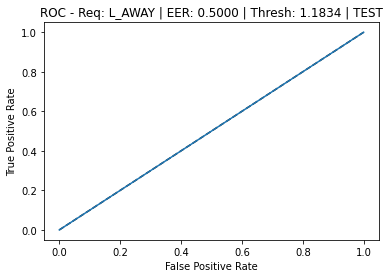

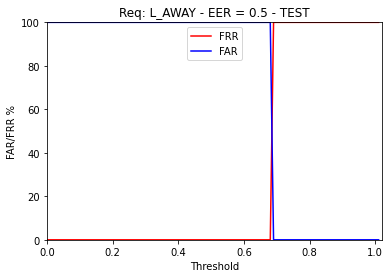

Requisite: L_AWAY - EER_interp: 50.0% - Best Threshold: 1.1833722591400146
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      1.00      0.46        87
    COMPLIANT       0.00      0.00      0.00       201

     accuracy                           0.30       288
    macro avg       0.15      0.50      0.23       288
 weighted avg       0.09      0.30      0.14       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 87 | FP: 0 | FN: 201
Accuracy ------------------------------------------------
Model Accuracy: 30.209999999999997%
---------------------------------------------------------
Requisite: EYES_CLOSED


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


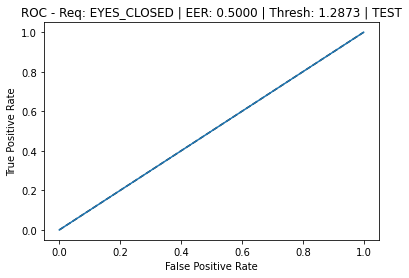

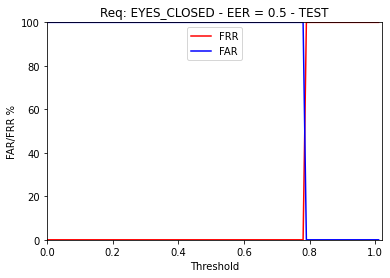

Requisite: EYES_CLOSED - EER_interp: 50.0% - Best Threshold: 1.2873241901397705
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      1.00      0.32        55
    COMPLIANT       0.00      0.00      0.00       233

     accuracy                           0.19       288
    macro avg       0.10      0.50      0.16       288
 weighted avg       0.04      0.19      0.06       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 55 | FP: 0 | FN: 233
Accuracy ------------------------------------------------
Model Accuracy: 19.1%
---------------------------------------------------------
Requisite: CLOSE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


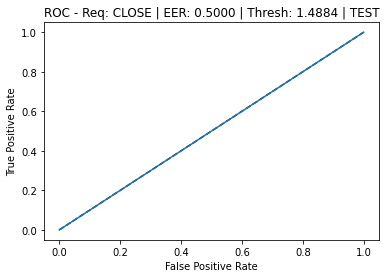

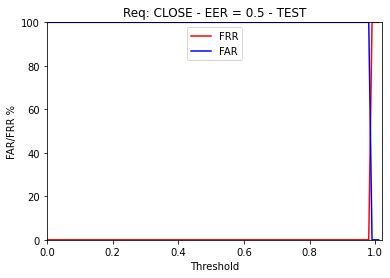

Requisite: CLOSE - EER_interp: 50.0% - Best Threshold: 1.4884271621704102
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         2
    COMPLIANT       0.00      0.00      0.00       286

     accuracy                           0.01       288
    macro avg       0.00      0.50      0.01       288
 weighted avg       0.00      0.01      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 2 | FP: 0 | FN: 286
Accuracy ------------------------------------------------
Model Accuracy: 0.69%
---------------------------------------------------------
Requisite: HAT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


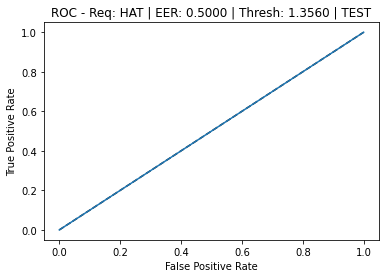

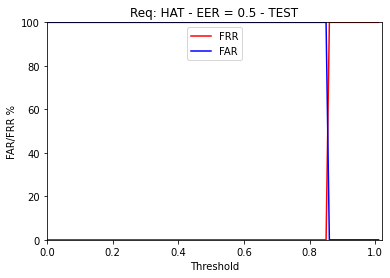

Requisite: HAT - EER_interp: 50.0% - Best Threshold: 1.356014996767044
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      1.00      0.30        51
    COMPLIANT       0.00      0.00      0.00       237

     accuracy                           0.18       288
    macro avg       0.09      0.50      0.15       288
 weighted avg       0.03      0.18      0.05       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 51 | FP: 0 | FN: 237
Accuracy ------------------------------------------------
Model Accuracy: 17.71%
---------------------------------------------------------
Requisite: DARK_GLASSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


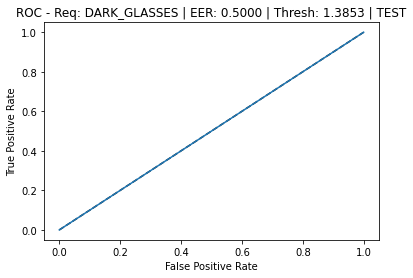

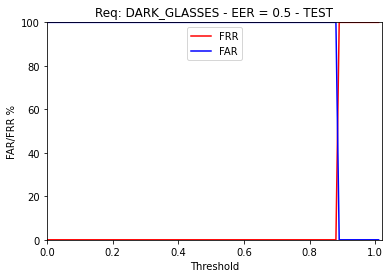

Requisite: DARK_GLASSES - EER_interp: 50.0% - Best Threshold: 1.3852572739124298
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      1.00      0.19        31
    COMPLIANT       0.00      0.00      0.00       257

     accuracy                           0.11       288
    macro avg       0.05      0.50      0.10       288
 weighted avg       0.01      0.11      0.02       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 31 | FP: 0 | FN: 257
Accuracy ------------------------------------------------
Model Accuracy: 10.76%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


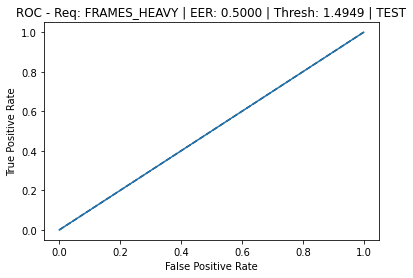

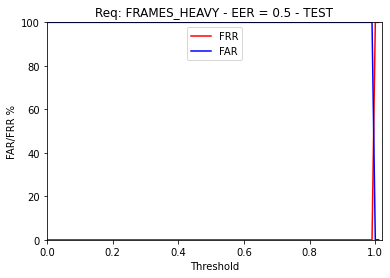

Requisite: FRAMES_HEAVY - EER_interp: 50.0% - Best Threshold: 1.4948934316635132
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         2
    COMPLIANT       0.00      0.00      0.00       286

     accuracy                           0.01       288
    macro avg       0.00      0.50      0.01       288
 weighted avg       0.00      0.01      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 2 | FP: 0 | FN: 286
Accuracy ------------------------------------------------
Model Accuracy: 0.69%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


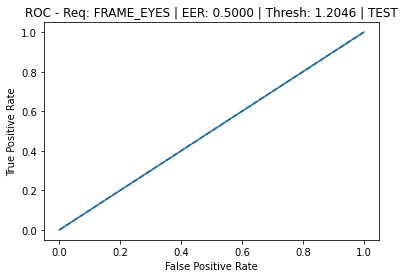

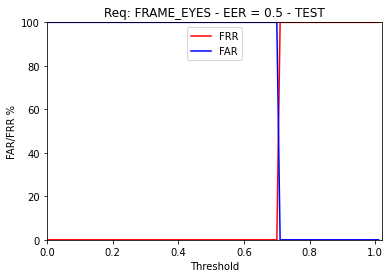

Requisite: FRAME_EYES - EER_interp: 50.0% - Best Threshold: 1.2045975029468536
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      1.00      0.45        84
    COMPLIANT       0.00      0.00      0.00       204

     accuracy                           0.29       288
    macro avg       0.15      0.50      0.23       288
 weighted avg       0.09      0.29      0.13       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 84 | FP: 0 | FN: 204
Accuracy ------------------------------------------------
Model Accuracy: 29.17%
---------------------------------------------------------
Requisite: FLASH_LENSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


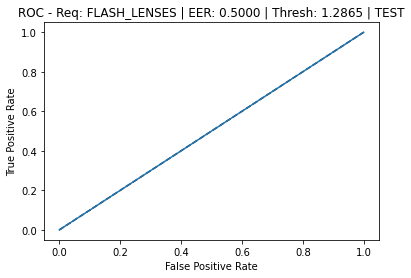

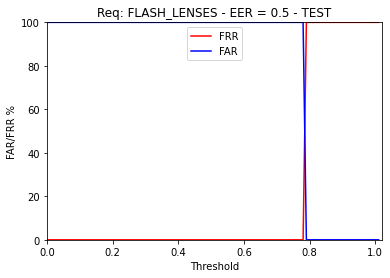

Requisite: FLASH_LENSES - EER_interp: 50.0% - Best Threshold: 1.2865169048309326
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      1.00      0.34        60
    COMPLIANT       0.00      0.00      0.00       228

     accuracy                           0.21       288
    macro avg       0.10      0.50      0.17       288
 weighted avg       0.04      0.21      0.07       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 60 | FP: 0 | FN: 228
Accuracy ------------------------------------------------
Model Accuracy: 20.830000000000002%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


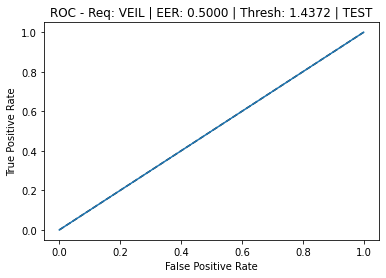

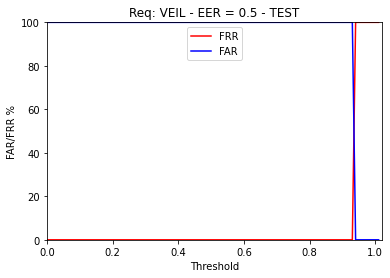

Requisite: VEIL - EER_interp: 50.0% - Best Threshold: 1.4372345209121704
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.14        21
    COMPLIANT       0.00      0.00      0.00       267

     accuracy                           0.07       288
    macro avg       0.04      0.50      0.07       288
 weighted avg       0.01      0.07      0.01       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 21 | FP: 0 | FN: 267
Accuracy ------------------------------------------------
Model Accuracy: 7.290000000000001%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


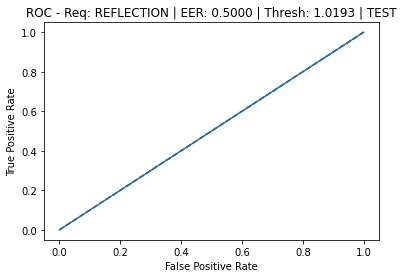

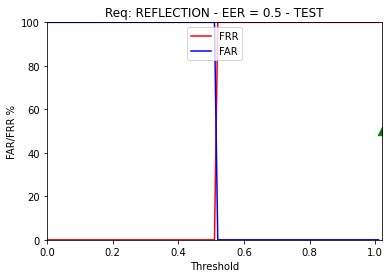

Requisite: REFLECTION - EER_interp: 50.0% - Best Threshold: 1.0192770957946777
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      1.00      0.63       132
    COMPLIANT       0.00      0.00      0.00       156

     accuracy                           0.46       288
    macro avg       0.23      0.50      0.31       288
 weighted avg       0.21      0.46      0.29       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 132 | FP: 0 | FN: 156
Accuracy ------------------------------------------------
Model Accuracy: 45.83%
---------------------------------------------------------
Requisite: LIGHT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


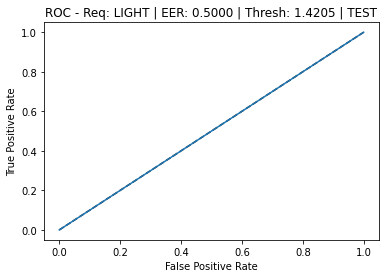

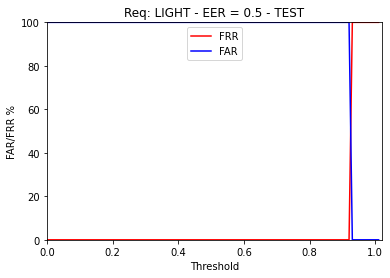

Requisite: LIGHT - EER_interp: 50.0% - Best Threshold: 1.4205305576324463
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      1.00      0.15        23
    COMPLIANT       0.00      0.00      0.00       265

     accuracy                           0.08       288
    macro avg       0.04      0.50      0.07       288
 weighted avg       0.01      0.08      0.01       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 23 | FP: 0 | FN: 265
Accuracy ------------------------------------------------
Model Accuracy: 7.99%
---------------------------------------------------------
Requisite: SH_FACE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


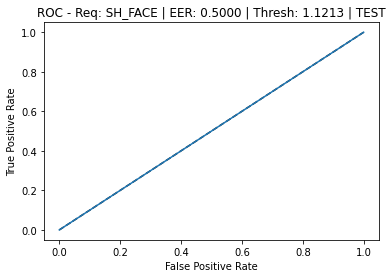

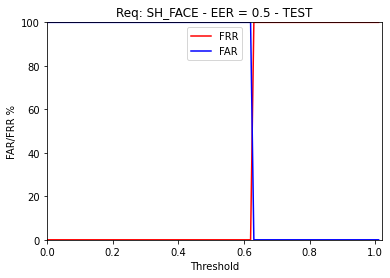

Requisite: SH_FACE - EER_interp: 50.0% - Best Threshold: 1.1212673485279083
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      1.00      0.55       108
    COMPLIANT       0.00      0.00      0.00       180

     accuracy                           0.38       288
    macro avg       0.19      0.50      0.27       288
 weighted avg       0.14      0.38      0.20       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 108 | FP: 0 | FN: 180
Accuracy ------------------------------------------------
Model Accuracy: 37.5%
---------------------------------------------------------
Requisite: SH_HEAD


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


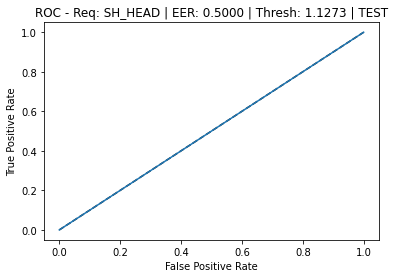

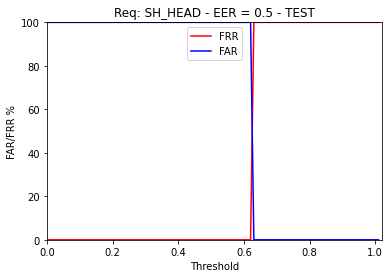

Requisite: SH_HEAD - EER_interp: 50.0% - Best Threshold: 1.1272571086883545
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      1.00      0.53       103
    COMPLIANT       0.00      0.00      0.00       185

     accuracy                           0.36       288
    macro avg       0.18      0.50      0.26       288
 weighted avg       0.13      0.36      0.19       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 103 | FP: 0 | FN: 185
Accuracy ------------------------------------------------
Model Accuracy: 35.76%
---------------------------------------------------------
Requisite: BLURRED


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


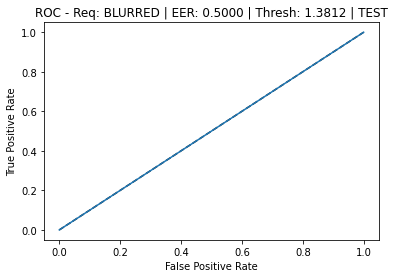

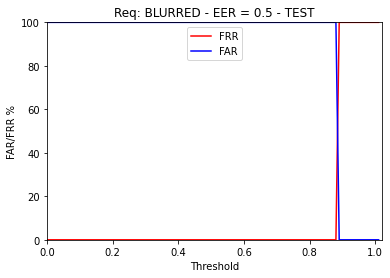

Requisite: BLURRED - EER_interp: 50.0% - Best Threshold: 1.3811997175216675
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      1.00      0.22        35
    COMPLIANT       0.00      0.00      0.00       253

     accuracy                           0.12       288
    macro avg       0.06      0.50      0.11       288
 weighted avg       0.01      0.12      0.03       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 35 | FP: 0 | FN: 253
Accuracy ------------------------------------------------
Model Accuracy: 12.15%
---------------------------------------------------------
Requisite: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


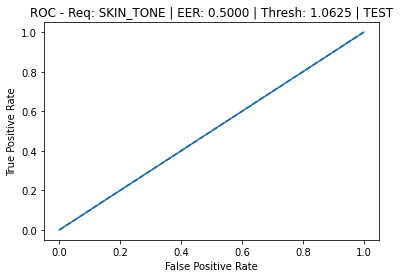

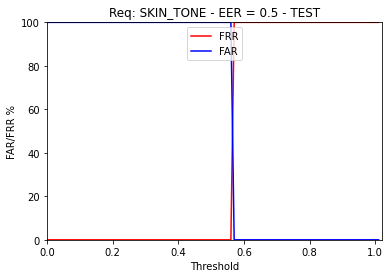

Requisite: SKIN_TONE - EER_interp: 50.0% - Best Threshold: 1.0625284910202026
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.40      1.00      0.57       115
    COMPLIANT       0.00      0.00      0.00       173

     accuracy                           0.40       288
    macro avg       0.20      0.50      0.29       288
 weighted avg       0.16      0.40      0.23       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 115 | FP: 0 | FN: 173
Accuracy ------------------------------------------------
Model Accuracy: 39.93%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


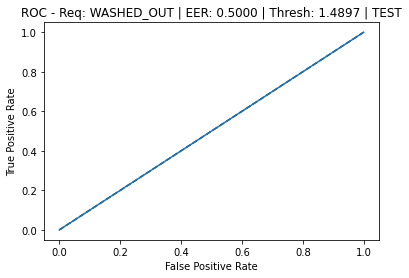

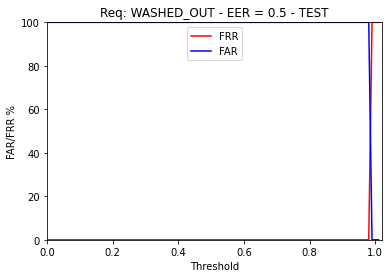

Requisite: WASHED_OUT - EER_interp: 50.0% - Best Threshold: 1.4897267818450928
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.03         4
    COMPLIANT       0.00      0.00      0.00       284

     accuracy                           0.01       288
    macro avg       0.01      0.50      0.01       288
 weighted avg       0.00      0.01      0.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 4 | FP: 0 | FN: 284
Accuracy ------------------------------------------------
Model Accuracy: 1.39%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


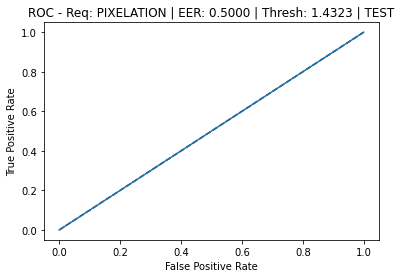

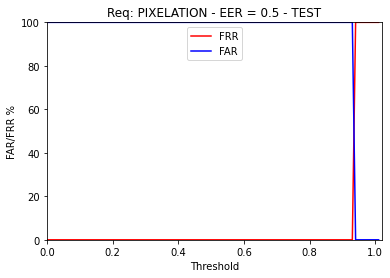

Requisite: PIXELATION - EER_interp: 50.0% - Best Threshold: 1.4323146343231201
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.09      1.00      0.17        26
    COMPLIANT       0.00      0.00      0.00       262

     accuracy                           0.09       288
    macro avg       0.05      0.50      0.08       288
 weighted avg       0.01      0.09      0.01       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 26 | FP: 0 | FN: 262
Accuracy ------------------------------------------------
Model Accuracy: 9.030000000000001%
---------------------------------------------------------
Requisite: HAIR_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


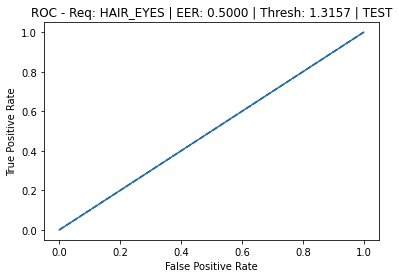

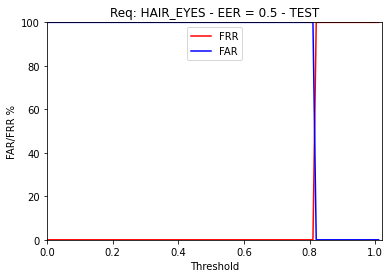

Requisite: HAIR_EYES - EER_interp: 50.0% - Best Threshold: 1.315682202577591
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      1.00      0.30        50
    COMPLIANT       0.00      0.00      0.00       238

     accuracy                           0.17       288
    macro avg       0.09      0.50      0.15       288
 weighted avg       0.03      0.17      0.05       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 50 | FP: 0 | FN: 238
Accuracy ------------------------------------------------
Model Accuracy: 17.36%
---------------------------------------------------------
Requisite: BACKGROUND


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


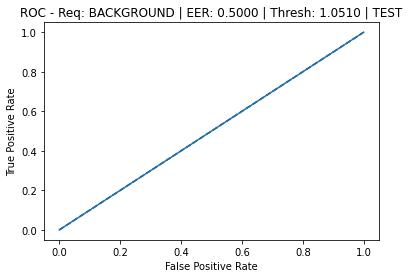

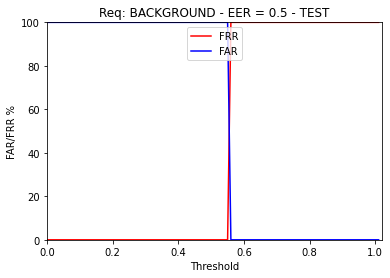

Requisite: BACKGROUND - EER_interp: 50.0% - Best Threshold: 1.0509608089923859
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.47      1.00      0.64       134
    COMPLIANT       0.00      0.00      0.00       154

     accuracy                           0.47       288
    macro avg       0.23      0.50      0.32       288
 weighted avg       0.22      0.47      0.30       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 134 | FP: 0 | FN: 154
Accuracy ------------------------------------------------
Model Accuracy: 46.53%
---------------------------------------------------------
Requisite: RED_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


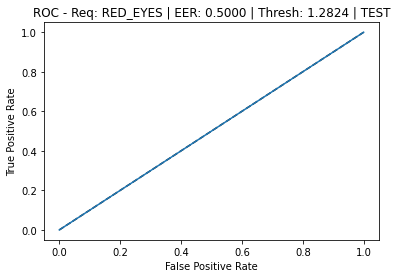

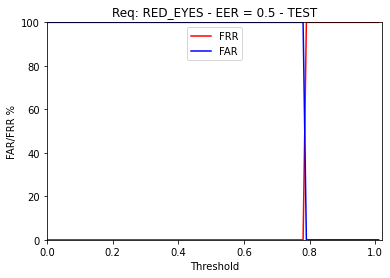

Requisite: RED_EYES - EER_interp: 50.0% - Best Threshold: 1.2824110984802246
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      1.00      0.32        55
    COMPLIANT       0.00      0.00      0.00       233

     accuracy                           0.19       288
    macro avg       0.10      0.50      0.16       288
 weighted avg       0.04      0.19      0.06       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 55 | FP: 0 | FN: 233
Accuracy ------------------------------------------------
Model Accuracy: 19.1%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [17]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
